In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,sr_no,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
X = df.iloc[ : , 3:].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)



In [260]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    KN = KMeans(n_clusters=i)
    KN.fit_predict(X)
    wcss.append(KN.inertia_)

wcss

C:\Users\Rushi\anaconda3\anacondasetup\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rushi\anaconda3\anacondasetup\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rushi\anaconda3\anacondasetup\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rushi\anaconda3\anacondasetup\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

[400.0,
 274.05153869931064,
 157.70400815035947,
 122.89391687381251,
 65.56840815571681,
 57.286209321574646,
 47.70784156804295,
 42.95971123366715,
 33.99185540951994,
 29.874970454397427]

Text(0.5, 1.0, 'KMeans Clutering')

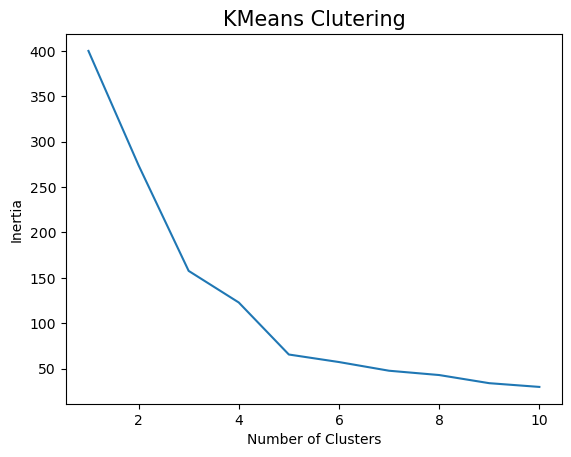

In [262]:
plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters", fontsize=10)
plt.ylabel("Inertia", fontsize=10)
plt.title("KMeans Clutering", fontsize=15)

In [264]:
KM = KMeans(n_clusters=5)
y_means = KM.fit_predict(X)

C:\Users\Rushi\anaconda3\anacondasetup\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [246]:
X[y_means == 0,0]

array([-0.82293289, -0.78476346, -0.78476346, -0.78476346, -0.78476346,
       -0.70842461, -0.70842461, -0.67025518, -0.67025518, -0.67025518,
       -0.67025518, -0.63208575, -0.63208575, -0.55574689, -0.55574689,
       -0.55574689, -0.55574689, -0.51757746, -0.51757746, -0.47940803,
       -0.47940803, -0.47940803, -0.47940803, -0.47940803, -0.47940803,
       -0.4412386 , -0.4412386 , -0.40306917, -0.40306917, -0.25039146,
       -0.25039146, -0.25039146, -0.25039146, -0.25039146, -0.25039146,
       -0.25039146, -0.25039146, -0.25039146, -0.25039146, -0.25039146,
       -0.25039146, -0.13588317, -0.13588317, -0.09771374, -0.09771374,
       -0.05954431, -0.05954431, -0.02137488, -0.02137488, -0.02137488,
       -0.02137488, -0.02137488, -0.02137488,  0.01679455,  0.01679455,
        0.05496398,  0.05496398,  0.05496398,  0.05496398,  0.05496398,
        0.05496398,  0.09313341,  0.09313341,  0.09313341,  0.09313341,
        0.09313341,  0.09313341,  0.13130284,  0.13130284,  0.16

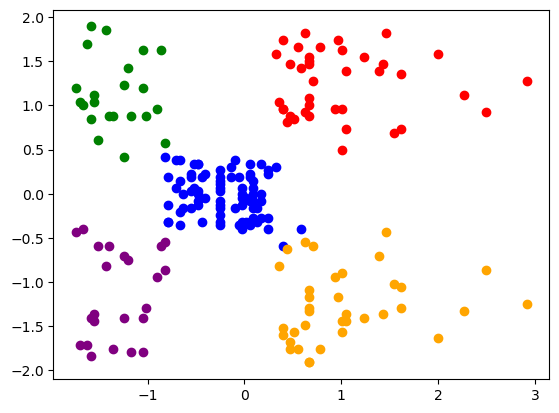

In [248]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], color='blue')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], color='red')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], color='green')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], color='orange')
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], color='purple')

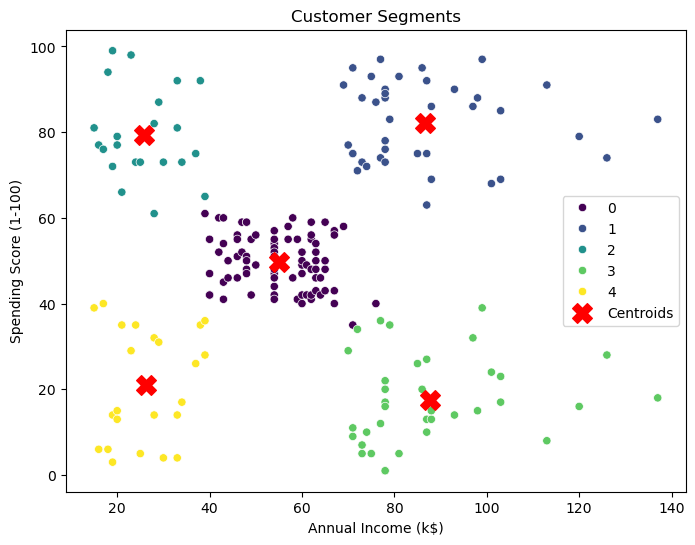

In [250]:
# Add the cluster labels to the DataFrame
df['Cluster'] = KM.labels_

# Scatter plot of the data
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis'
)

# Plot centroids
centroids = sc.inverse_transform(KM.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add title and legend
plt.title('Customer Segments')
plt.legend()
plt.show()

In [252]:
df

,sr_no,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Mall_Customers.csv')

In [16]:
X = df.iloc[ : , 3: ]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [26]:
from sklearn.cluster import KMeans

wcss= []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit_predict(X)
    wcss.append(KM.inertia_)

wcss

C:\Users\Rushi\anaconda3\anacondasetup\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rushi\anaconda3\anacondasetup\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rushi\anaconda3\anacondasetup\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rushi\anaconda3\anacondasetup\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

[400.0,
 276.44878073832723,
 157.70400815035947,
 109.22822707921347,
 65.56840815571681,
 55.10377812115057,
 47.7105837613079,
 37.667323037468265,
 39.27000720675762,
 32.17298817226869]

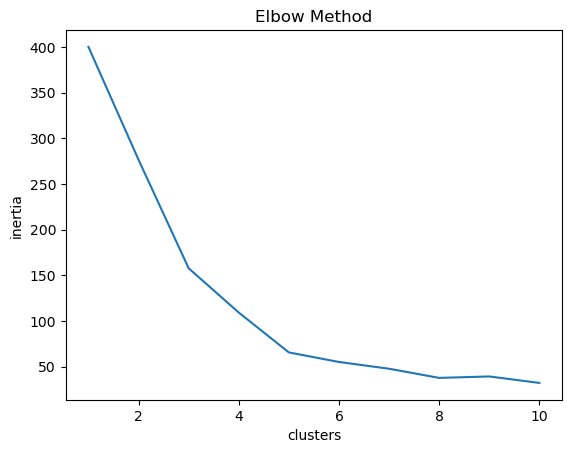

In [34]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("clusters")
plt.ylabel("inertia")
plt.show()

In [40]:
KN = KMeans(n_clusters=5)
y_means = KN.fit_predict(X)

C:\Users\Rushi\anaconda3\anacondasetup\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


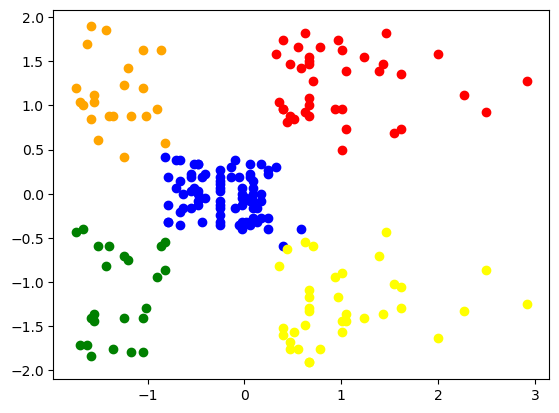

In [44]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], color='blue')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], color='yellow')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], color='red')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], color='green')
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], color='orange')